## Списки

Вам дан список. Поменяйте местами первую и вторую половину списка.

In [ ]:
# ваше решение

lst = [1, 2, 3, 4, 5, 6, 7]
n = len(lst)
half = n // 2
new_lst = lst[half:] + lst[:half]
print(new_lst)

[4, 5, 6, 7, 1, 2, 3]


Вам дан список. Поменяйте в нём местами блоки элементов: каждый нечётный со первого по пятый с начала с каждым чётный со второго по пятый с конца. 

In [262]:
# ваше решение
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

odd_start = lst[0:5:2]
even_end = lst[-2:-7:-2]
#print(even_end)

lst[0:5:2], lst[-2:-7:-2] = even_end[::-1], odd_start[::-1]

print(lst)

[7, 2, 9, 4, 11, 6, 1, 8, 3, 10, 5, 12]


## Генераторы

Вам дан список. Создайте новый список, в котором останутся только чётные элементы кратные трём. 

In [263]:
# ваше решение
lst = [i for i in range(0,25)]
#print(lst)
print([lst[i] for i in range(0, len(lst), 2) if (lst[i]%3 == 0)])

[0, 6, 12, 18, 24]


Вам дан список. Для него и ивертированного по порядку списка выведите пары (x, y) в новом списке.

In [264]:
# ваше решение
lst = [i for i in range(0,25)]
print(" ".join(list(map(str,[(x, y) for x, y in zip(lst, lst[::-1])]))))

(0, 24) (1, 23) (2, 22) (3, 21) (4, 20) (5, 19) (6, 18) (7, 17) (8, 16) (9, 15) (10, 14) (11, 13) (12, 12) (13, 11) (14, 10) (15, 9) (16, 8) (17, 7) (18, 6) (19, 5) (20, 4) (21, 3) (22, 2) (23, 1) (24, 0)


## Встроенные функции

Вам дана строка. Выведите сумму ascii-кодов элементов в строке. 

In [265]:
# ваше решение
s = "ABC"
print(sum(ord(c) for c in s))

198


Вам дана строка. Выведите строку, выведите пары (элемент строки, порядковый номер).

In [266]:
# ваше решение
s = "ABC"
print(" ".join(list(map(str,[(s[x], x) for x in range(len(s))]))))

('A', 0) ('B', 1) ('C', 2)


## NumPy

Дан массив 16х16
Создайте новый массив 4х4 , элементы которого будут суммой блоков 4х4 исходного массива

In [267]:
# ваше решение
import numpy as np

a = np.arange(1, 257).reshape(16, 16)
# print(a)
b = a.reshape(4, 4, 4, 4)  # [[[[1234], [5678], [9101112], [13141516]], [вторая строка] ... 4строка] [второй блок из 4 строк] ... 4 блок]
# print(b)
c = b.transpose(0, 2, 1, 3) # 2 <-> 1, то есть "меняем строки и блоки", буквально транспонируем матрицу внутри
# print(c)
print(c.sum(axis=(3,2)))


[[ 424  488  552  616]
 [1448 1512 1576 1640]
 [2472 2536 2600 2664]
 [3496 3560 3624 3688]]


Дан массив, вставьте между каждым значением сумму соседних элементов

In [268]:
# ваше решение
a = np.arange(1,10)
sums = a[:-1] + a[1:]
res = np.empty(a.size + sums.size, dtype=a.dtype)
res[0::2] = a
res[1::2] = sums
print(res)

[ 1  3  2  5  3  7  4  9  5 11  6 13  7 15  8 17  9]


## Pandas

https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Постройте график распределения переменной `actual_productivity`.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных.
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных категорий в колонке `quarter` *(т.е. отдельно какие показатели у класса quarter1, какие у класса quarter2 и и т.д.)*.
- Разделите колонку `date` на три: день, месяц, год.

In [269]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Download latest version
path = kagglehub.dataset_download("ishadss/productivity-prediction-of-garment-employees")

print("Path to dataset files:", path)

csv_path = [f for f in os.listdir(path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_path))

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\ishadss\productivity-prediction-of-garment-employees\versions\1


In [270]:
print(df.dtypes)

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [271]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

wip    506
dtype: int64


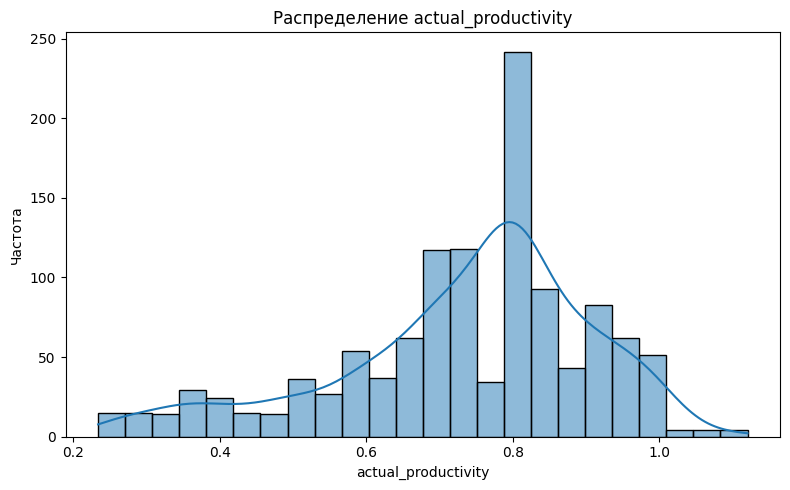

In [272]:
plt.figure(figsize=(8,5))
sns.histplot(df['actual_productivity'], kde=True)
plt.title('Распределение actual_productivity')
plt.xlabel('actual_productivity')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

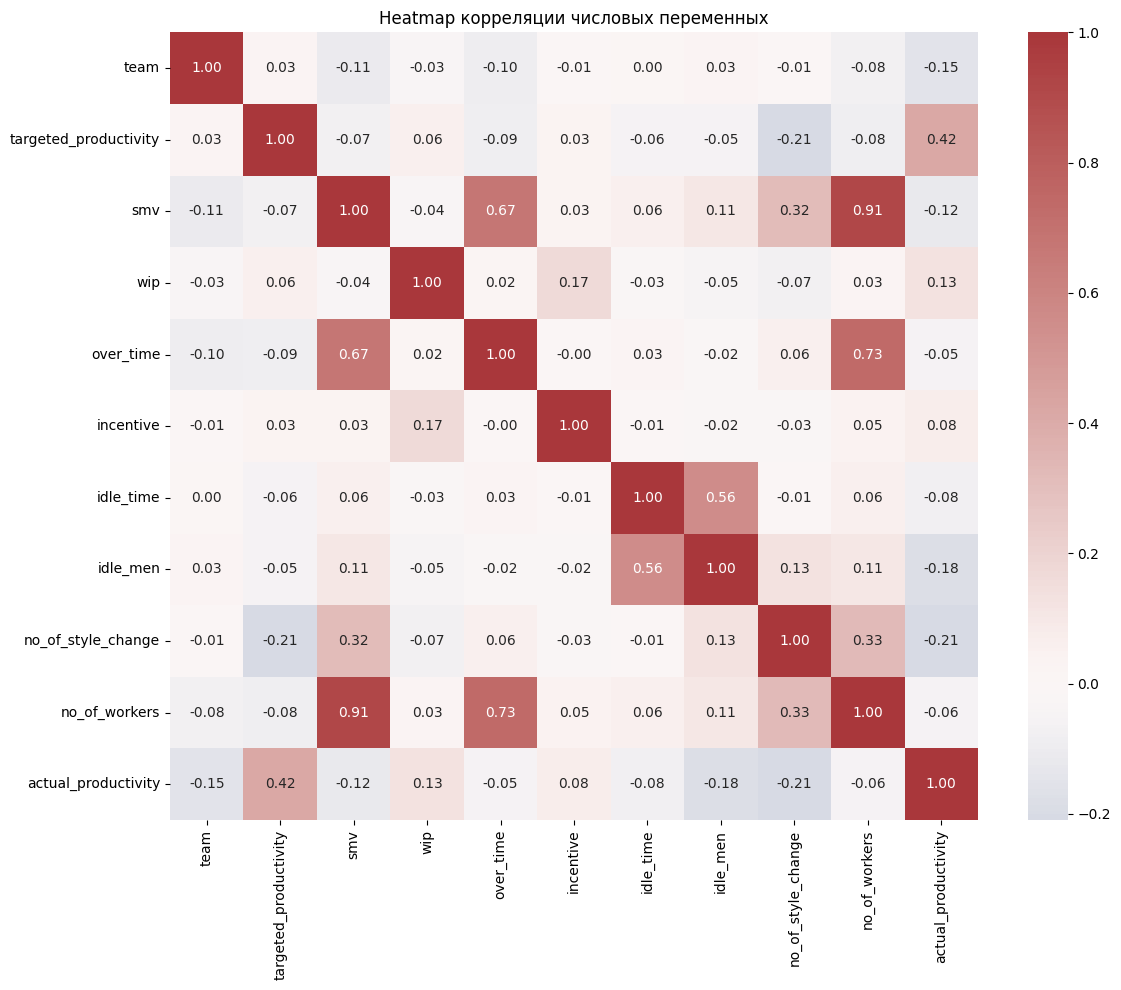

In [273]:
numeric = df.select_dtypes(include=[np.number])
corr = numeric.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title('Heatmap корреляции числовых переменных')
plt.tight_layout()
plt.show()


Числовых колонок для pairplot: 11


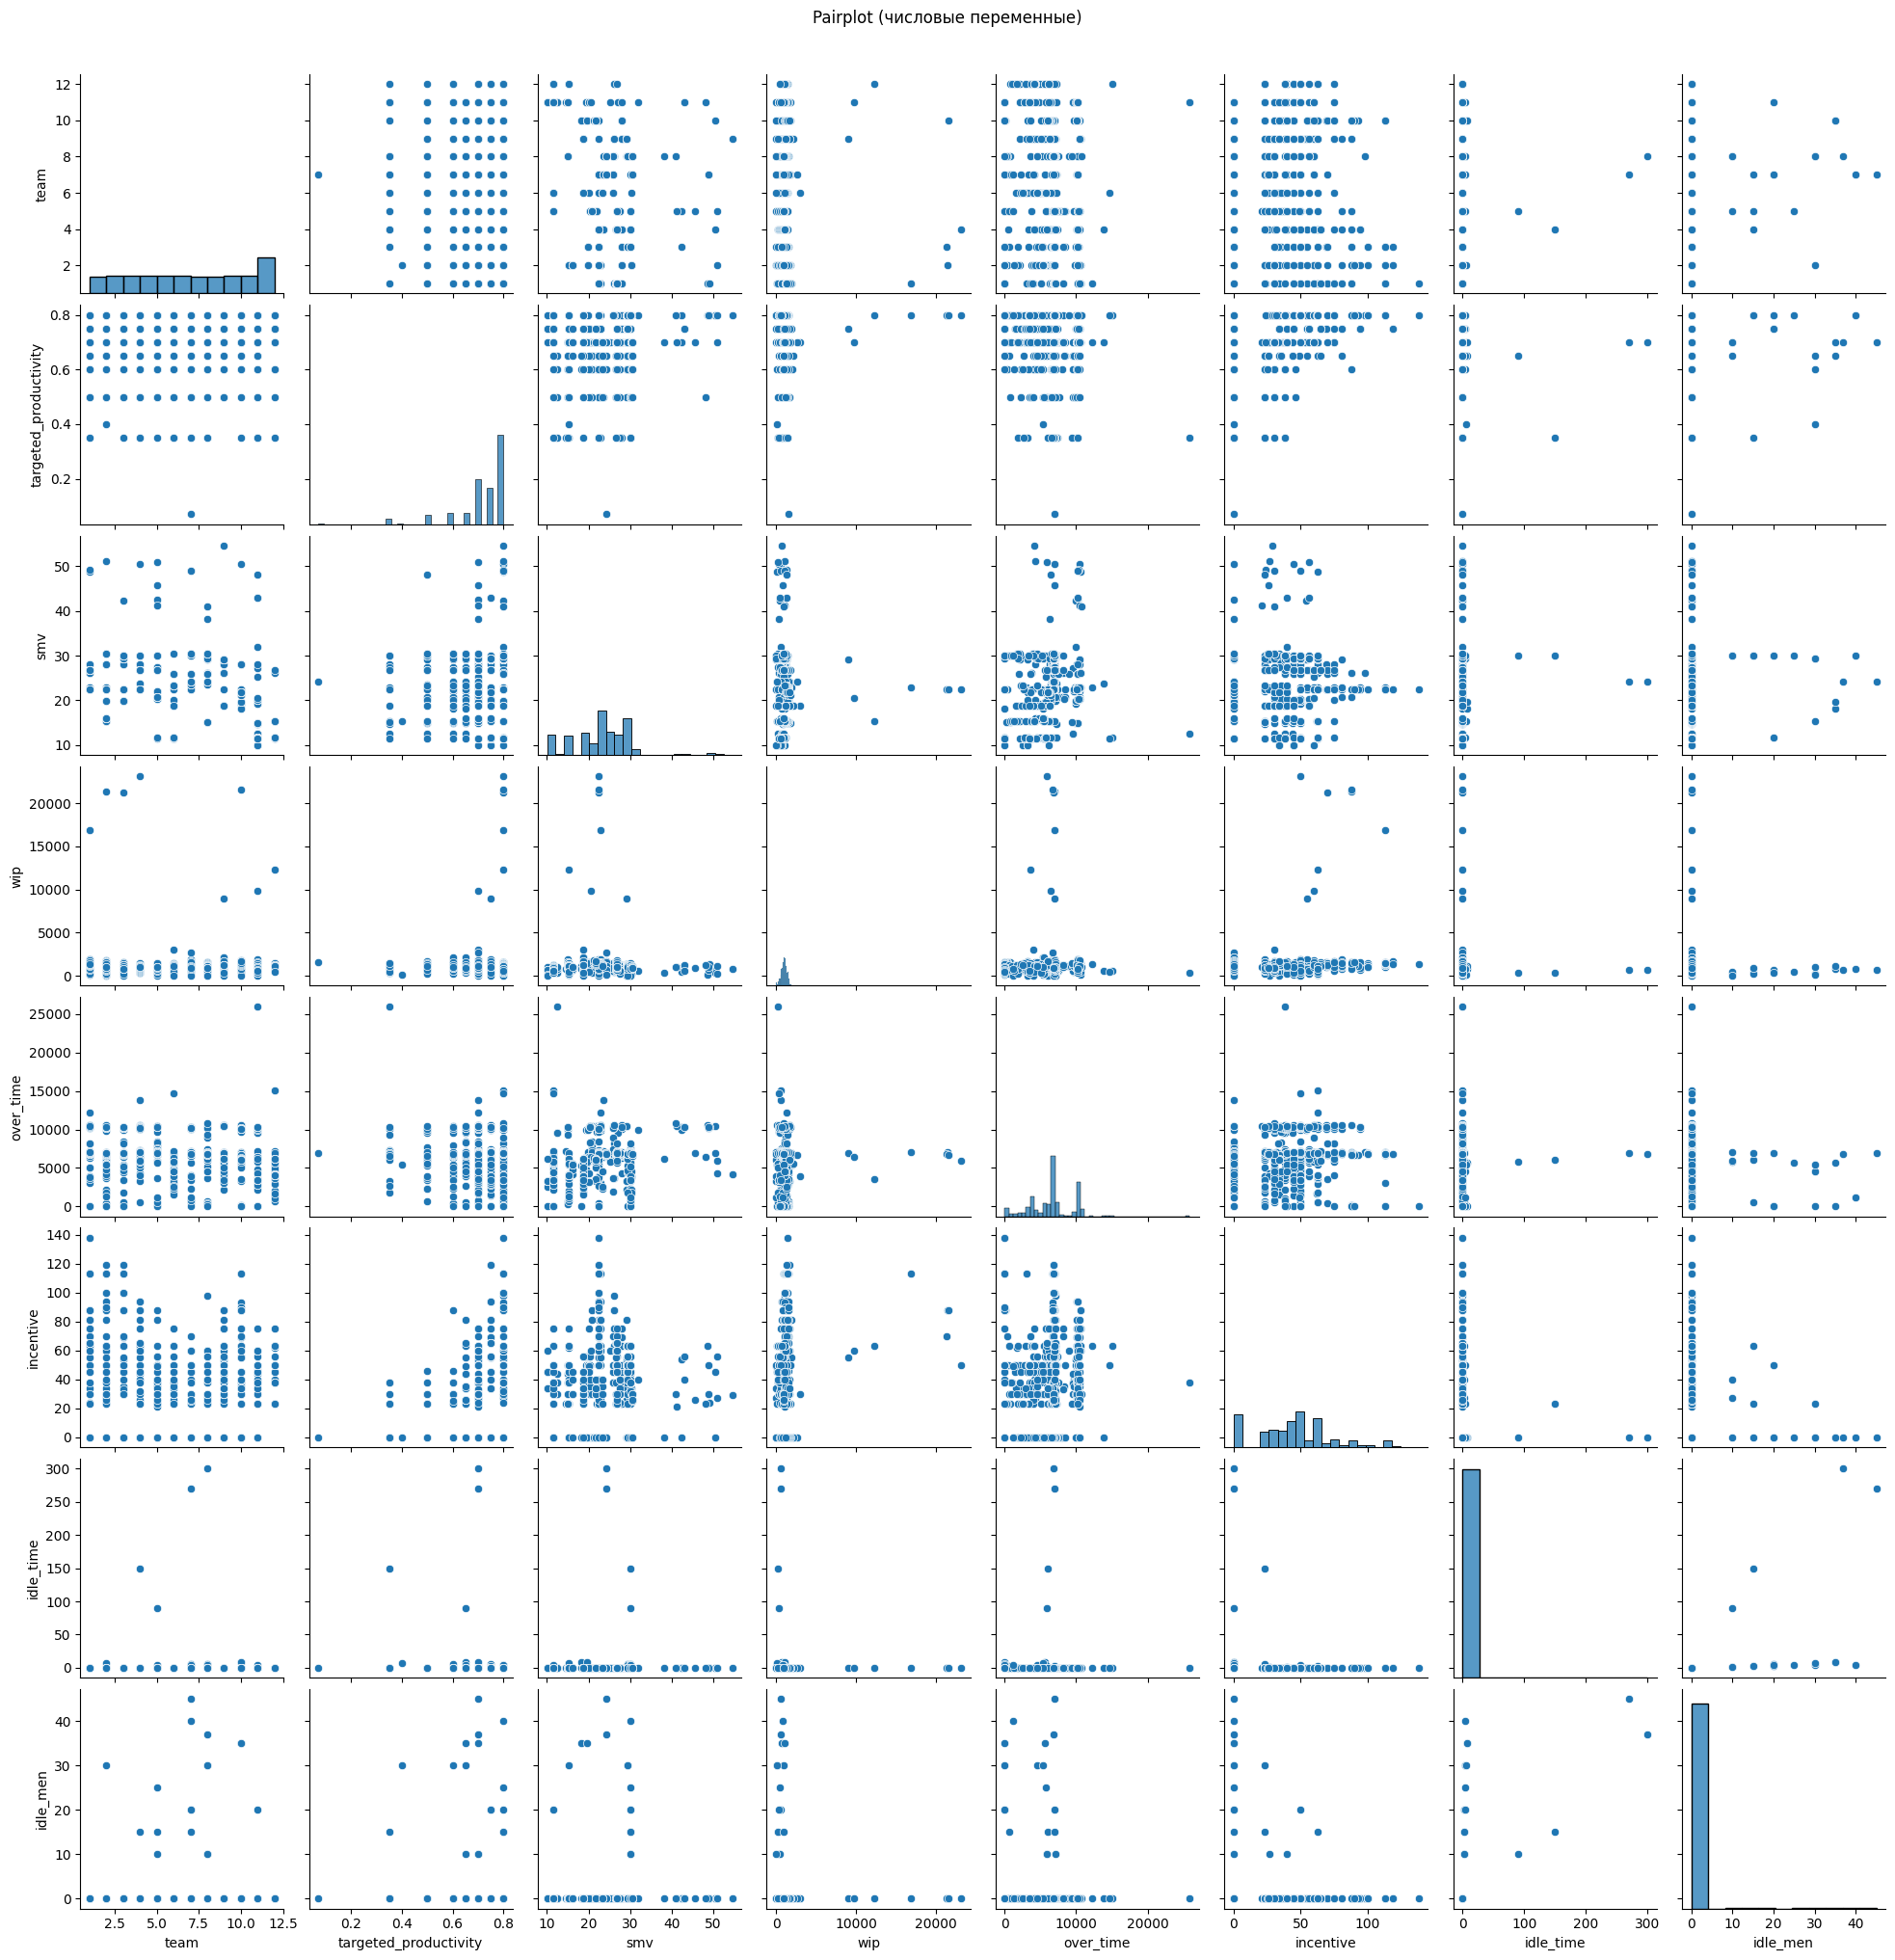

In [274]:
cols_for_pair = numeric.columns.tolist()
print(f"\nЧисловых колонок для pairplot: {len(cols_for_pair)}")
if len(cols_for_pair) > 10:
    cols_for_pair = cols_for_pair[:8]
sns.pairplot(df[cols_for_pair].dropna())
plt.suptitle('Pairplot (числовые переменные)', y=1.02)
plt.show()

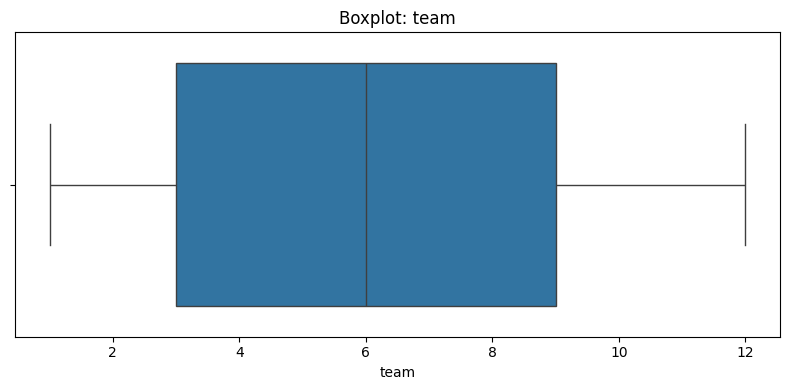

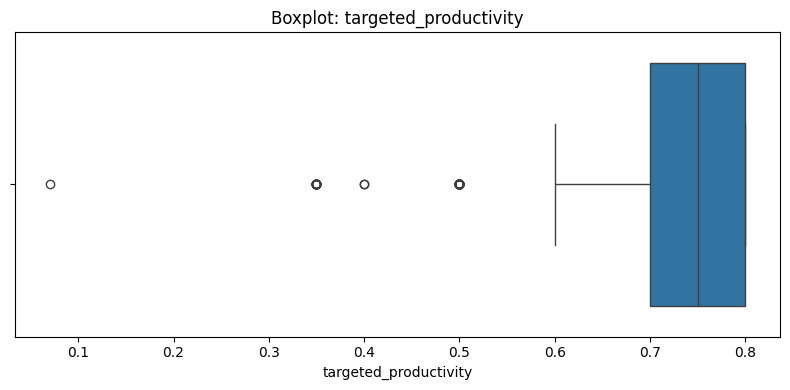

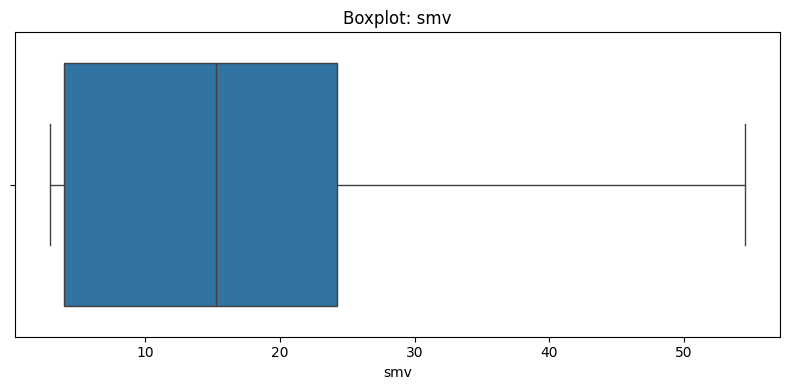

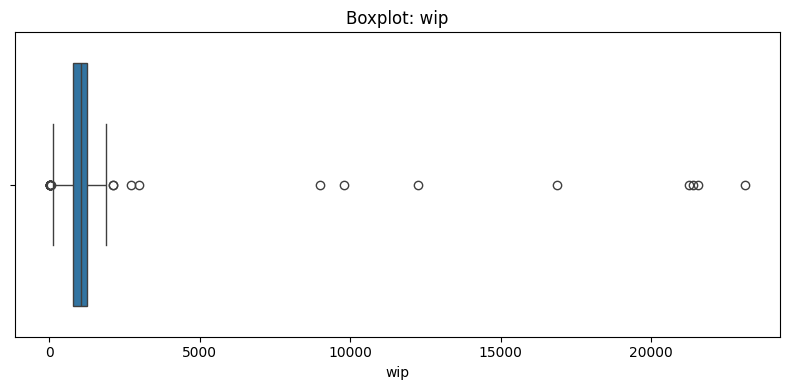

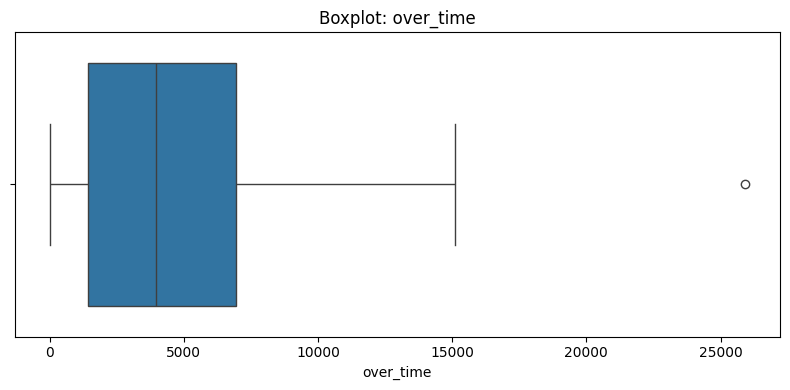

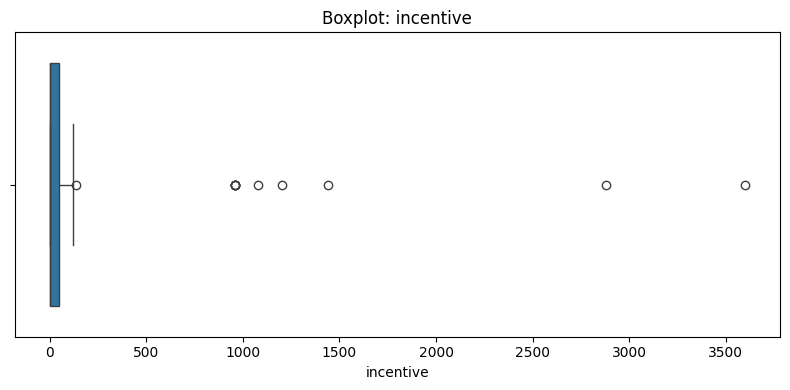

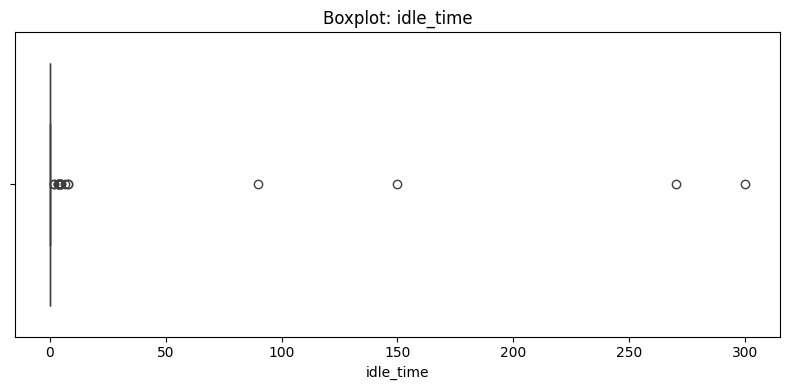

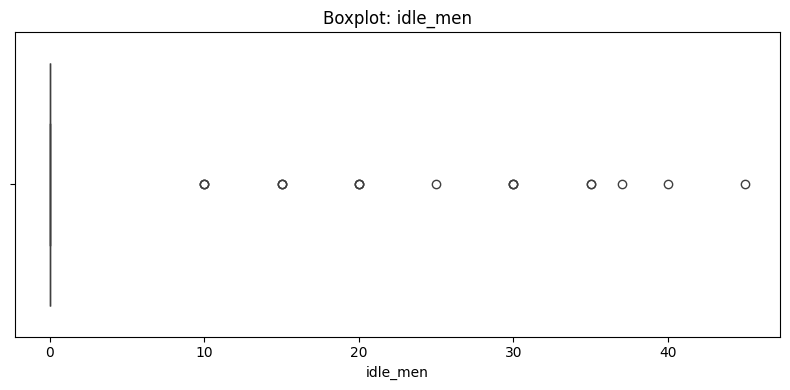

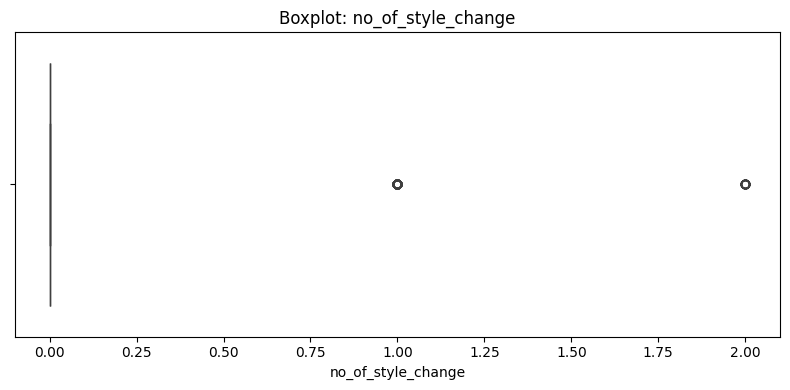

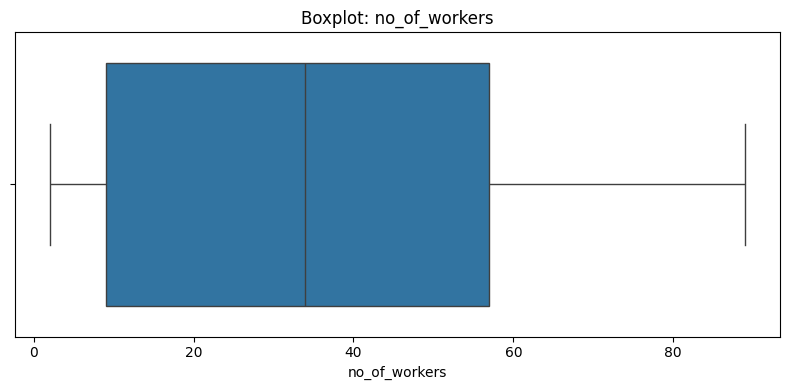

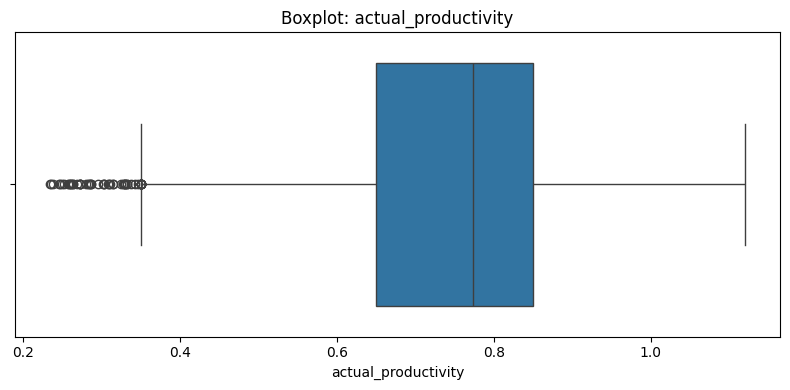

После удаления дубликатов осталось 267 уникальных строк-выбросов.
Примеры строк-выбросов (показаны полностью):


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,_outlier_for
60,1/4/2015,Quarter1,finishing,Sunday,11,0.75,4.15,NaN,960,0,0.0,0,0,8.0,0.345833,actual_productivity
125,1/7/2015,Quarter1,finishing,Wednesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,0.330114,actual_productivity
146,1/8/2015,Quarter2,sweing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951,targeted_productivity
147,1/8/2015,Quarter2,sweing,Thursday,5,0.70,42.41,724.0,10260,0,0.0,0,0,57.0,0.233705,actual_productivity
165,1/10/2015,Quarter2,sweing,Saturday,11,0.50,12.52,749.0,9540,38,0.0,0,0,53.0,0.673245,targeted_productivity
168,1/10/2015,Quarter2,sweing,Saturday,5,0.50,20.79,966.0,7680,0,0.0,0,0,56.0,0.388008,targeted_productivity
169,1/10/2015,Quarter2,finishing,Saturday,5,0.50,4.15,NaN,1440,0,0.0,0,0,8.0,0.337973,targeted_productivity
187,1/11/2015,Quarter2,finishing,Sunday,5,0.50,4.15,NaN,1440,0,0.0,0,0,8.0,0.609138,targeted_productivity
194,1/12/2015,Quarter2,finishing,Monday,4,0.35,4.30,NaN,3240,0,0.0,0,0,18.0,0.942214,targeted_productivity
214,1/12/2015,Quarter2,sweing,Monday,4,0.35,22.40,581.0,7350,0,0.0,0,0,51.5,0.350633,targeted_productivity


In [275]:
outliers_rows = pd.DataFrame()

# --- Поиск выбросов и построение boxplot'ов ---
for col in numeric.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

    series = df[col]
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    mask = (series < lower) | (series > upper)
    if mask.any():
        tmp = df[mask].copy()
        tmp['_outlier_for'] = col
        outliers_rows = pd.concat([outliers_rows, tmp], ignore_index=False)
if outliers_rows.empty:
    print("Не найдено выбросов по IQR-правилу в числовых колонках.")
else:

    unique_outliers = outliers_rows[~outliers_rows.index.duplicated(keep='first')]
    print(f"После удаления дубликатов осталось {unique_outliers.shape[0]} уникальных строк-выбросов.")
    print("Примеры строк-выбросов (показаны полностью):")
    # display(unique_outliers.head(20))


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Не обрезать текст в ячейках
pd.set_option('display.max_colwidth', None)

# Не сворачивать в одну строку
pd.set_option('display.expand_frame_repr', False)
display(unique_outliers.sort_index().head(20))


In [276]:
grouped = df.groupby('quarter')['actual_productivity'].agg(['mean', 'median', 'min', 'max'])
print(grouped)

grouped = df.groupby('quarter')['no_of_workers'].agg(['mean', 'median', 'min', 'max'])
print(grouped)

grouped = df.groupby('quarter')['targeted_productivity'].agg(['mean', 'median', 'min', 'max'])
print(grouped)

              mean    median       min       max
quarter                                         
Quarter1  0.751560  0.800045  0.260979  1.050667
Quarter2  0.743710  0.800035  0.233705  1.100484
Quarter3  0.704759  0.725436  0.235795  1.120437
Quarter4  0.709067  0.750411  0.259375  1.059621
Quarter5  0.826177  0.888276  0.286985  1.000457
               mean  median  min   max
quarter                               
Quarter1  34.843056    34.0  8.0  60.0
Quarter2  33.735821    34.0  2.0  60.0
Quarter3  36.440476    48.5  2.0  89.0
Quarter4  34.425403    34.0  4.0  60.0
Quarter5  31.659091    33.0  2.0  59.0
              mean  median   min  max
quarter                              
Quarter1  0.744083    0.80  0.07  0.8
Quarter2  0.732090    0.80  0.35  0.8
Quarter3  0.721190    0.75  0.35  0.8
Quarter4  0.714516    0.75  0.35  0.8
Quarter5  0.718182    0.75  0.50  0.8


In [277]:
df['date_parsed'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)
df['date_parsed'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')
n_na_dates = df['date_parsed'].isna().sum()
print(f"\nНе удалось распарсить {n_na_dates} строк в колонке date (будут NaT).")
df['date_day'] = df['date_parsed'].dt.day
df['date_month'] = df['date_parsed'].dt.month
df['date_year'] = df['date_parsed'].dt.year
print("Добавлены колонки: date_day, date_month, date_year. Примеры:")
display(df[['date','date_parsed','date_day','date_month','date_year']].head(10))



Не удалось распарсить 0 строк в колонке date (будут NaT).
Добавлены колонки: date_day, date_month, date_year. Примеры:


,date,date_parsed,date_day,date_month,date_year
0,1/1/2015,2015-01-01,1,1,2015
1,1/1/2015,2015-01-01,1,1,2015
2,1/1/2015,2015-01-01,1,1,2015
3,1/1/2015,2015-01-01,1,1,2015
4,1/1/2015,2015-01-01,1,1,2015
5,1/1/2015,2015-01-01,1,1,2015
6,1/1/2015,2015-01-01,1,1,2015
7,1/1/2015,2015-01-01,1,1,2015
8,1/1/2015,2015-01-01,1,1,2015
9,1/1/2015,2015-01-01,1,1,2015
